In [1]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
DMRfile="/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/BL14_all_matrixCin_nr0.4_imputed_g1_CD4_3_g2_others_33.txt"
mixturegtfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/CD4mixture_output_1000000_highestCD430percent.txt'
mixturegtdf=pd.read_csv(mixturegtfile,sep="\t",index_col=0)

celltype='CD4' #################################
DMRdf=pd.read_csv(DMRfile,sep="\t",index_col=['chrom','start','end'])


DMRdf.head()

,,,q,diff,#cpg,p(MWU),p(2dks),CD4,others,CD4.1,CD8,nB,...,CD4-m8,CD4-DC,CD4-Eo,CD4-Tr,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta
chrom,start,end,,,,,,,,,,,,,,,,,,,,,
chr1,32387133,32387499,1.785900e-12,-0.584534,11,4.363200e-14,9.452200e-17,0.35261,0.93714,0.352606,0.886636,0.971727,...,-0.590663,-0.627905,-0.584754,-0.501935,-0.452617,-0.601208,-0.608663,-0.614178,-0.452617,-0.635087
chr10,5754070,5754515,1.133300e-13,-0.583604,13,4.496400e-14,4.844000e-18,0.30687,0.89048,0.306872,0.745462,0.968974,...,-0.434899,-0.660617,-0.611245,-0.352938,-0.337668,-0.662784,-0.663015,-0.661489,-0.337668,-0.675412
chr11,64490608,64490797,3.732800e-10,-0.555806,10,4.196600e-14,3.598000e-14,0.19153,0.74734,0.191533,0.567433,0.777767,...,-0.354470,-0.628070,-0.602220,-0.519620,-0.316970,-0.726920,-0.669520,-0.539303,-0.316970,-0.726920
chr12,3905651,3906251,2.642700e-10,-0.658527,8,5.173600e-14,2.418200e-14,0.17879,0.83732,0.178792,0.680625,0.966458,...,-0.552210,-0.770793,-0.317085,-0.674397,-0.467648,-0.630022,-0.632148,-0.704043,-0.317085,-0.790710
chr14,77029428,77029733,1.273400e-14,-0.587526,11,4.607400e-14,4.440900e-19,0.18803,0.77556,0.188030,0.554576,0.837364,...,-0.630197,-0.707849,-0.569470,-0.372152,-0.406061,-0.703652,-0.691561,-0.399818,-0.366546,-0.744940


In [2]:

mixturegtdf.head()

,CD4_real,CD8,nB,NK,Mn,mNeu,m8,DC,Eo,Tr,m4,Mg,Er,mB
Mixture,,,,,,,,,,,,,,
CD4allrange_NR_1000000_insilmix1,0.0010,15.130581,6.549795,2.520113,2.125096,3.652364,17.371882,4.150787,3.904976,6.341485,14.306244,10.983494,3.043937,9.918246
CD4allrange_NR_1000000_insilmix2,0.0010,7.889197,0.139814,4.502655,8.466055,28.994228,1.305132,4.240528,9.992709,0.685469,5.727678,11.272038,8.458354,8.325141
CD4allrange_NR_1000000_insilmix3,0.0010,11.134076,11.332065,10.310223,7.306791,13.036470,9.752954,3.163723,11.701545,2.309071,3.907681,1.537214,13.598139,0.909049
CD4allrange_NR_1000000_insilmix4,0.0015,0.563823,15.085903,1.743170,5.081503,8.321133,13.542942,9.127465,4.780691,9.983499,19.703788,3.882455,0.196108,7.986019
CD4allrange_NR_1000000_insilmix5,0.0015,4.321027,10.280554,3.859671,9.166718,11.053749,9.091109,12.889172,1.183944,6.149850,1.665803,16.875359,4.591560,8.869982


In [3]:
allct=mixturegtdf.columns.tolist()
allct.remove(celltype+"_real")
allct

['CD8',
 'nB',
 'NK',
 'Mn',
 'mNeu',
 'm8',
 'DC',
 'Eo',
 'Tr',
 'm4',
 'Mg',
 'Er',
 'mB']

In [4]:
#create required columns
reccol=[]
for ct in allct:
    reccol.append(celltype+"-"+ct)
reccol

['CD4-CD8',
 'CD4-nB',
 'CD4-NK',
 'CD4-Mn',
 'CD4-mNeu',
 'CD4-m8',
 'CD4-DC',
 'CD4-Eo',
 'CD4-Tr',
 'CD4-m4',
 'CD4-Mg',
 'CD4-Er',
 'CD4-mB']

In [5]:
DMRdfreccol=DMRdf[reccol]
DMRdfreccol.head()

,,,CD4-CD8,CD4-nB,CD4-NK,CD4-Mn,CD4-mNeu,CD4-m8,CD4-DC,CD4-Eo,CD4-Tr,CD4-m4,CD4-Mg,CD4-Er,CD4-mB
chrom,start,end,,,,,,,,,,,,,
chr1,32387133,32387499,-0.534026,-0.619117,-0.597208,-0.635087,-0.575754,-0.590663,-0.627905,-0.584754,-0.501935,-0.452617,-0.601208,-0.608663,-0.614178
chr10,5754070,5754515,-0.438592,-0.662104,-0.634386,-0.675412,-0.645361,-0.434899,-0.660617,-0.611245,-0.352938,-0.337668,-0.662784,-0.663015,-0.661489
chr11,64490608,64490797,-0.375903,-0.586237,-0.539503,-0.690470,-0.627937,-0.354470,-0.628070,-0.602220,-0.519620,-0.316970,-0.726920,-0.669520,-0.539303
chr12,3905651,3906251,-0.501835,-0.787668,-0.746127,-0.790710,-0.760293,-0.552210,-0.770793,-0.317085,-0.674397,-0.467648,-0.630022,-0.632148,-0.704043
chr14,77029428,77029733,-0.366546,-0.649334,-0.649728,-0.744940,-0.695849,-0.630197,-0.707849,-0.569470,-0.372152,-0.406061,-0.703652,-0.691561,-0.399818


In [6]:
DMRdfforTPR=abs(DMRdfreccol)
DMRdfforTPR.head()

,,,CD4-CD8,CD4-nB,CD4-NK,CD4-Mn,CD4-mNeu,CD4-m8,CD4-DC,CD4-Eo,CD4-Tr,CD4-m4,CD4-Mg,CD4-Er,CD4-mB
chrom,start,end,,,,,,,,,,,,,
chr1,32387133,32387499,0.534026,0.619117,0.597208,0.635087,0.575754,0.590663,0.627905,0.584754,0.501935,0.452617,0.601208,0.608663,0.614178
chr10,5754070,5754515,0.438592,0.662104,0.634386,0.675412,0.645361,0.434899,0.660617,0.611245,0.352938,0.337668,0.662784,0.663015,0.661489
chr11,64490608,64490797,0.375903,0.586237,0.539503,0.690470,0.627937,0.354470,0.628070,0.602220,0.519620,0.316970,0.726920,0.669520,0.539303
chr12,3905651,3906251,0.501835,0.787668,0.746127,0.790710,0.760293,0.552210,0.770793,0.317085,0.674397,0.467648,0.630022,0.632148,0.704043
chr14,77029428,77029733,0.366546,0.649334,0.649728,0.744940,0.695849,0.630197,0.707849,0.569470,0.372152,0.406061,0.703652,0.691561,0.399818


In [10]:
mixturegtdfTForFPR=mixturegtdf.drop([celltype+"_real"],axis=1)
mixturegtdfTForFPR_T=mixturegtdfTForFPR.transpose()
mixturegtdfTForFPR_T.head()

Mixture,CD4allrange_NR_1000000_insilmix1,CD4allrange_NR_1000000_insilmix2,CD4allrange_NR_1000000_insilmix3,CD4allrange_NR_1000000_insilmix4,CD4allrange_NR_1000000_insilmix5,CD4allrange_NR_1000000_insilmix6,CD4allrange_NR_1000000_insilmix7,CD4allrange_NR_1000000_insilmix8,CD4allrange_NR_1000000_insilmix9,CD4allrange_NR_1000000_insilmix10,...,CD4allrange_NR_1000000_insilmix51,CD4allrange_NR_1000000_insilmix52,CD4allrange_NR_1000000_insilmix53,CD4allrange_NR_1000000_insilmix54,CD4allrange_NR_1000000_insilmix55,CD4allrange_NR_1000000_insilmix56,CD4allrange_NR_1000000_insilmix57,CD4allrange_NR_1000000_insilmix58,CD4allrange_NR_1000000_insilmix59,CD4allrange_NR_1000000_insilmix60
CD8,15.130581,7.889197,11.134076,0.563823,4.321027,10.330939,14.482959,2.969129,2.115642,8.869877,...,7.176114,8.396085,6.676087,0.401616,1.984799,0.151508,5.320858,1.816478,1.013579,0.570268
nB,6.549795,0.139814,11.332065,15.085903,10.280554,1.902784,6.652268,8.086823,7.497602,8.489052,...,3.767208,10.251249,13.416773,13.672933,11.150831,7.700816,0.321328,10.293143,0.320725,5.069703
NK,2.520113,4.502655,10.310223,1.743170,3.859671,2.027602,3.657562,8.331542,11.108044,3.870452,...,1.017102,6.283314,0.247700,7.858406,2.748960,11.111000,7.874577,1.845879,3.955309,1.343460
Mn,2.125096,8.466055,7.306791,5.081503,9.166718,10.571175,4.068936,1.534118,1.874326,8.350543,...,7.110714,0.978033,7.006886,0.313312,1.054446,12.159857,9.900851,5.047417,9.133212,1.985036
mNeu,3.652364,28.994228,13.036470,8.321133,11.053749,7.978389,1.013334,11.574191,8.666181,2.044733,...,1.872904,5.827398,14.281271,9.708279,1.919202,6.574155,8.404823,2.850823,9.562346,8.202476


In [16]:
####reame for multiplication#####

mixturegtdfTForFPR_Tindex=mixturegtdfTForFPR_T.index.tolist()
for mi in mixturegtdfTForFPR_Tindex:
    mixturegtdfTForFPR_T.rename(index={mi:celltype+"-"+mi},inplace=True)
mixturegtdfTForFPR_T.head()

Mixture,CD4allrange_NR_1000000_insilmix1,CD4allrange_NR_1000000_insilmix2,CD4allrange_NR_1000000_insilmix3,CD4allrange_NR_1000000_insilmix4,CD4allrange_NR_1000000_insilmix5,CD4allrange_NR_1000000_insilmix6,CD4allrange_NR_1000000_insilmix7,CD4allrange_NR_1000000_insilmix8,CD4allrange_NR_1000000_insilmix9,CD4allrange_NR_1000000_insilmix10,...,CD4allrange_NR_1000000_insilmix51,CD4allrange_NR_1000000_insilmix52,CD4allrange_NR_1000000_insilmix53,CD4allrange_NR_1000000_insilmix54,CD4allrange_NR_1000000_insilmix55,CD4allrange_NR_1000000_insilmix56,CD4allrange_NR_1000000_insilmix57,CD4allrange_NR_1000000_insilmix58,CD4allrange_NR_1000000_insilmix59,CD4allrange_NR_1000000_insilmix60
CD4-CD8,15.130581,7.889197,11.134076,0.563823,4.321027,10.330939,14.482959,2.969129,2.115642,8.869877,...,7.176114,8.396085,6.676087,0.401616,1.984799,0.151508,5.320858,1.816478,1.013579,0.570268
CD4-nB,6.549795,0.139814,11.332065,15.085903,10.280554,1.902784,6.652268,8.086823,7.497602,8.489052,...,3.767208,10.251249,13.416773,13.672933,11.150831,7.700816,0.321328,10.293143,0.320725,5.069703
CD4-NK,2.520113,4.502655,10.310223,1.743170,3.859671,2.027602,3.657562,8.331542,11.108044,3.870452,...,1.017102,6.283314,0.247700,7.858406,2.748960,11.111000,7.874577,1.845879,3.955309,1.343460
CD4-Mn,2.125096,8.466055,7.306791,5.081503,9.166718,10.571175,4.068936,1.534118,1.874326,8.350543,...,7.110714,0.978033,7.006886,0.313312,1.054446,12.159857,9.900851,5.047417,9.133212,1.985036
CD4-mNeu,3.652364,28.994228,13.036470,8.321133,11.053749,7.978389,1.013334,11.574191,8.666181,2.044733,...,1.872904,5.827398,14.281271,9.708279,1.919202,6.574155,8.404823,2.850823,9.562346,8.202476


In [17]:
DMRwiseFPR=DMRdfforFPR.dot(mixturegtdfTForFPR_T)
DMRwiseFPR.head()

,,Mixture,CD4allrange_NR_1000000_insilmix1,CD4allrange_NR_1000000_insilmix2,CD4allrange_NR_1000000_insilmix3,CD4allrange_NR_1000000_insilmix4,CD4allrange_NR_1000000_insilmix5,CD4allrange_NR_1000000_insilmix6,CD4allrange_NR_1000000_insilmix7,CD4allrange_NR_1000000_insilmix8,CD4allrange_NR_1000000_insilmix9,CD4allrange_NR_1000000_insilmix10,...,CD4allrange_NR_1000000_insilmix51,CD4allrange_NR_1000000_insilmix52,CD4allrange_NR_1000000_insilmix53,CD4allrange_NR_1000000_insilmix54,CD4allrange_NR_1000000_insilmix55,CD4allrange_NR_1000000_insilmix56,CD4allrange_NR_1000000_insilmix57,CD4allrange_NR_1000000_insilmix58,CD4allrange_NR_1000000_insilmix59,CD4allrange_NR_1000000_insilmix60
chrom,start,end,,,,,,,,,,,,,,,,,,,,,
chr1,32387133,32387499,43.549658,41.688597,41.457023,43.484575,40.451028,42.655281,43.647079,42.114734,41.476221,42.012308,...,40.020043,38.901768,36.822148,36.103572,37.097191,36.130936,37.662127,29.056305,29.760631,29.066729
chr10,5754070,5754515,48.023492,38.921182,41.469226,46.850119,39.501453,43.925881,47.648646,42.038616,41.600327,43.536403,...,41.047191,41.177642,34.620201,34.463672,38.302517,35.393224,36.572981,29.240527,29.658625,30.254500
chr11,64490608,64490797,51.033952,40.808009,44.735354,49.162595,41.115464,44.464203,48.471466,44.138458,43.519754,45.729364,...,42.812723,43.103101,36.391121,38.555687,39.132680,37.844167,38.465522,31.349641,29.131928,30.870655
chr12,3905651,3906251,40.084916,35.223479,36.979989,36.018139,31.164076,36.845244,39.036898,36.277789,35.977868,37.829597,...,36.809437,34.046620,29.415814,30.193086,31.335643,28.184795,34.244219,24.192472,25.951220,23.698614
chr14,77029428,77029733,46.360067,38.403485,39.001653,43.792958,37.622815,42.921943,46.164477,40.975845,39.282271,42.741342,...,40.049931,41.352954,34.311434,34.537134,37.865620,33.906955,36.283752,29.301430,29.049783,28.356560


In [23]:
DMRwiseFPRavg=DMRwiseFPR.mean(axis=1)

In [18]:
def plt_corr(x, y,combined):
    fig = plt.figure()
    lm = sns.lmplot(x=x, y=y, data=combined)
    ax = lm.axes[0, 0]
    p_corr = np.around(corrdf_pearson[x][y], decimals=3)
    s_corr = np.around(corrdf_spearman[x][y], decimals=3)
    p_val_pearson = np.around(pearsonr(combined[x], combined[y])[1], decimals=8)
    p_val_spearman = np.around(spearmanr(combined[x], combined[y])[1], decimals=8)
    txt = 'r = ' + str(p_corr) + ', p-val = ' + str(p_val_pearson) + '\nrho = ' + str(s_corr) + ', p-val = ' + str(p_val_spearman)
    ax.text(np.array(combined[x].sort_values())[0], np.array(combined[y].sort_values())[-2], txt, horizontalalignment='left', verticalalignment='bottom')
    return lm

In [24]:

RDstats='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/mincpg1_feature_significance_Allfile_DMRwise_avg.txt_stats.txt'

RDstatsdf=pd.read_csv(RDstats,sep="\t",index_col=['chrom','start','end'])
RDstatsdf.head()

,,,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR,q,diff,...,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta,DMRlength,#cpg/DMRlength,DMRlength/#Total_Fragment,#Total_Fragment/DMRlength
chrom,start,end,,,,,,,,,,,,,,,,,,,,,
chr1,32387133,32387499,0.822727,2.109091,123.093939,1.772727,127.798485,0.624073,0.013452,0.851987,1.785900e-12,-0.584534,...,-0.452617,-0.601208,-0.608663,-0.614178,-0.452617,-0.635087,366,0.030055,2.863884,0.349176
chr10,5754070,5754515,1.392308,5.670513,131.166667,1.261538,139.491026,0.344499,0.042307,0.885537,1.133300e-13,-0.583604,...,-0.337668,-0.662784,-0.663015,-0.661489,-0.337668,-0.675412,445,0.029213,3.190169,0.313463
chr11,64490608,64490797,4.360000,51.411667,282.495000,3.370000,341.636667,0.427657,0.153829,0.937214,3.732800e-10,-0.555806,...,-0.316970,-0.726920,-0.669520,-0.539303,-0.316970,-0.726920,189,0.052910,0.553219,1.807601
chr12,3905651,3906251,3.587500,30.597917,182.606250,1.950000,218.741667,0.568029,0.125205,0.882720,2.642700e-10,-0.658527,...,-0.467648,-0.630022,-0.632148,-0.704043,-0.317085,-0.790710,600,0.013333,2.742962,0.364569
chr14,77029428,77029733,2.050000,23.165152,201.709091,1.345455,228.269697,0.399051,0.108957,0.935254,1.273400e-14,-0.587526,...,-0.406061,-0.703652,-0.691561,-0.399818,-0.366546,-0.744940,305,0.036066,1.336139,0.748425


In [25]:
RDstatsdf=RDstatsdf.merge(DMRwiseFPRavg.rename('SMestimatedFPR'),on=['chrom','start','end'])
RDstatsdf.head()

,,,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR,q,diff,...,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta,DMRlength,#cpg/DMRlength,DMRlength/#Total_Fragment,#Total_Fragment/DMRlength,SMestimatedFPR
chrom,start,end,,,,,,,,,,,,,,,,,,,,,
chr1,32387133,32387499,0.822727,2.109091,123.093939,1.772727,127.798485,0.624073,0.013452,0.851987,1.785900e-12,-0.584534,...,-0.601208,-0.608663,-0.614178,-0.452617,-0.635087,366,0.030055,2.863884,0.349176,40.726975
chr10,5754070,5754515,1.392308,5.670513,131.166667,1.261538,139.491026,0.344499,0.042307,0.885537,1.133300e-13,-0.583604,...,-0.662784,-0.663015,-0.661489,-0.337668,-0.675412,445,0.029213,3.190169,0.313463,41.429041
chr11,64490608,64490797,4.360000,51.411667,282.495000,3.370000,341.636667,0.427657,0.153829,0.937214,3.732800e-10,-0.555806,...,-0.726920,-0.669520,-0.539303,-0.316970,-0.726920,189,0.052910,0.553219,1.807601,43.448545
chr12,3905651,3906251,3.587500,30.597917,182.606250,1.950000,218.741667,0.568029,0.125205,0.882720,2.642700e-10,-0.658527,...,-0.630022,-0.632148,-0.704043,-0.317085,-0.790710,600,0.013333,2.742962,0.364569,35.166398
chr14,77029428,77029733,2.050000,23.165152,201.709091,1.345455,228.269697,0.399051,0.108957,0.935254,1.273400e-14,-0.587526,...,-0.703652,-0.691561,-0.399818,-0.366546,-0.744940,305,0.036066,1.336139,0.748425,40.492639


In [27]:
# sns.scatterplot(combined['FDR'], combined['FPR'])
corrdf_pearson=RDstatsdf.corr(method='pearson')
corrdf_spearman=RDstatsdf.corr(method='spearman')

<Figure size 432x288 with 0 Axes>

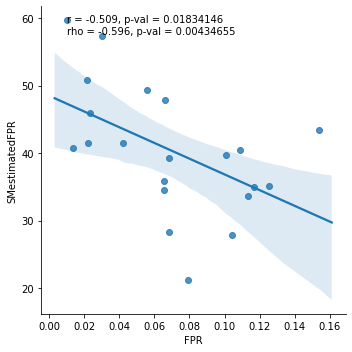

In [28]:
x = 'FPR'
y = 'SMestimatedFPR'
fig = plt_corr(x, y,RDstatsdf)